In [2]:
## Package ##




from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import numpy as np
from matplotlib import font_manager, rc
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
### Twitter API ### 




ACCESS_TOKEN = ""
ACCESS_TOKEN_SECRET = ""
CONSUMER_KEY = ""
CONSUMER_SECRET = ""

In [4]:
### Client Section ### 




class client_tweets():
    def __init__(self, twitter_user=None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)

        self.twitter_user = twitter_user

    def client_api(self):
        return self.twitter_client

    def user_timeline(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets

    def friend_list(self, num_friends):
        friend_list = []
        for friend in Cursor(self.twitter_client.friends, id=self.twitter_user).items(num_friends):
            friend_list.append(friend)
        return friend_list

    def home_timeline(self, num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline, id=self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets

    

# # # # TWITTER AUTHENTICATER # # # #




class TwitterAuthenticator():

    def authenticate_twitter_app(self):
        auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
        auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
        return auth

In [5]:
# # # # TWITTER STREAMER # # # #




class TwitterStreamer():
    
    def __init__(self):
        self.twitter_autenticator = TwitterAuthenticator()    

    def stream_tweets(self, streamdata, name_of_data):
        
        listener = TwitterListener(streamdata)
        auth = self.twitter_autenticator.authenticate_twitter_app() 
        stream = Stream(auth, listener)

        
        stream.filter(track=name_of_data)


In [8]:
# # # # TWITTER STREAM LISTENER # # # #




class TwitterListener(StreamListener):
    
    def __init__(self, streamdata):
        self.streamdata = streamdata

    def on_data(self, data):
        try:
            print(data)
            with open(self.streamdata, 'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("Error on_data %s" % str(e))
        return True
          
    def on_error(self, status):
        if status == 420:
           
            return False
        print(status)


class Data_frame_analyzer ():
    
    def data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])

        df['id'] = np.array([tweet.id for tweet in tweets])
        df['len'] = np.array([len(tweet.text) for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])
        df['place'] = np.array([tweet.place for tweet in tweets])
        df['geo'] = np.array([tweet.place for tweet in tweets])
        df['destroy'] = np.array([tweet.place for tweet in tweets])

        return df

125.345
529240
112618


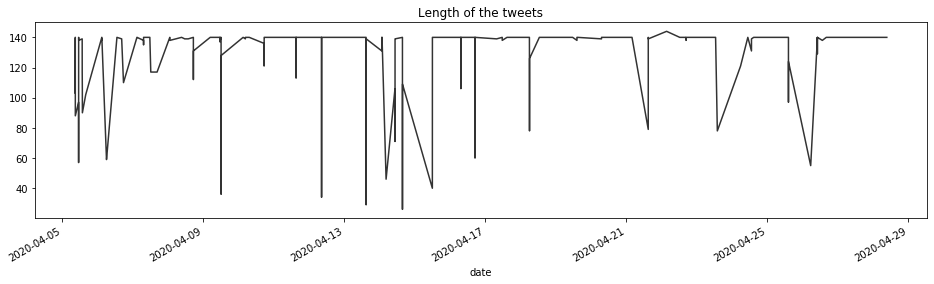

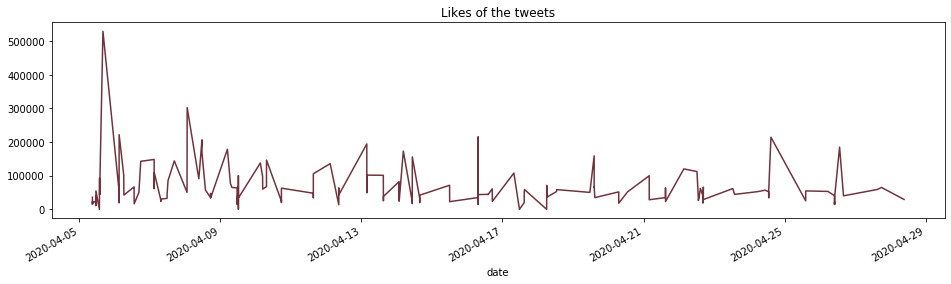

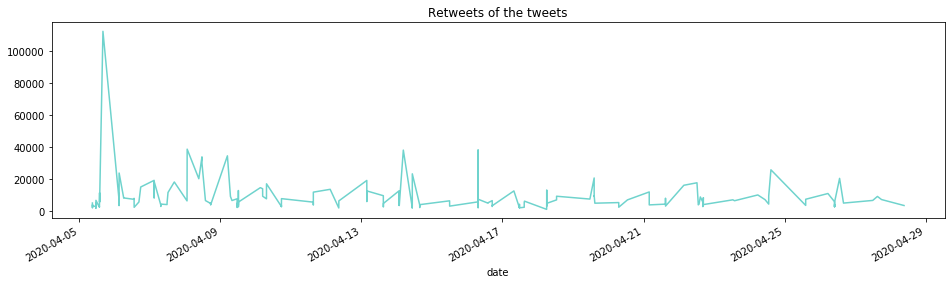

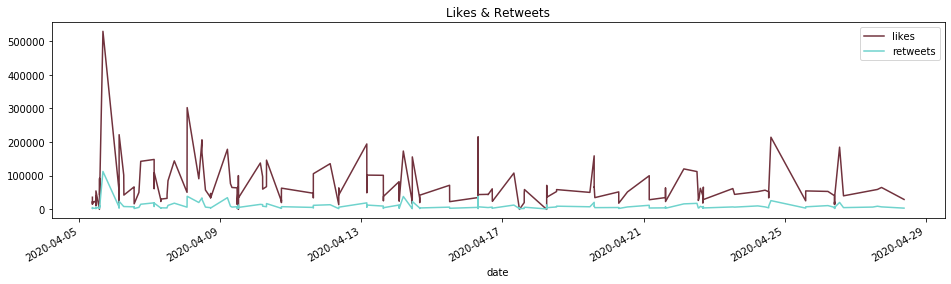

In [9]:
### Main Block ###




if __name__ == '__main__':

    twitter_client = client_tweets()
    data_frame_analyzer = Data_frame_analyzer()

    api = twitter_client.client_api()

    tweets = api.user_timeline(screen_name="@narendramodi", count=1000)

    #print(dir(tweets[0]))
    #print(tweets[0].retweet_count)

    df = data_frame_analyzer.data_frame(tweets)

    # Get average length over all tweets:
    print(np.mean(df['len']))

    # Get the number of likes for the most liked tweet:
    print(np.max(df['likes']))

    # Get the number of retweets for the most retweeted tweet:
    print(np.max(df['retweets']))
    
    #print(df.head(10))

    # Time Series
    time_likes = pd.Series(data=df['len'].values, index=df['date'])
    time_likes.plot(figsize=(16, 4), color='#333333')
    plt.title('Length of the tweets')
    plt.savefig('Length of the tweets.png')
    plt.show()
    
    time_favs = pd.Series(data=df['likes'].values, index=df['date'])
    time_favs.plot(figsize=(16, 4), color='#71323d')
    plt.title('Likes of the tweets')
    plt.savefig('Likes of the tweets.png')
    plt.show()

    time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
    time_retweets.plot(figsize=(16, 4), color='#6fd3cd')
    plt.title('Retweets of the tweets')
    plt.savefig('Retweets of the tweets.png')
    plt.show()
    
    #time_place = pd.Series(data=df['place'].values, index=df['date'])
    #time_place.plot(figsize=(16, 4), color='r')
    #plt.title('Location of the tweets')
    #ax = s.hist()
    #fig = ax.get_figure()
    #fig.savefig('Location of the tweets.jpg')
    #plt.show()

    # Layered Time Series:
    time_likes = pd.Series(data=df['likes'].values, index=df['date'])
    time_likes.plot(figsize=(16, 4), color='#71323d', label="likes", legend=True)

    time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
    time_retweets.plot(figsize=(16, 4),color='#6fd3cd', label="retweets", legend=True)
    plt.title('Likes & Retweets')
    
    plt.savefig('Likes & Retweets.png')
    plt.show()